In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
import matplotlib.colors as colors
import cartopy.crs as ccrs
import numpy as np

Initialize shapefiles and the raster file that defines the bounds and the CRS value

In [2]:
raster_path = "../data/processed/monthly_drought_labels/2016_08.tif"
shp_path_prov = "../data/external/Angola_provinces"
shp_path_mun = "../data/external/Angola_municipal"

In [3]:
with rio.open(raster_path) as src:
    bounds = src.bounds
    nodata_val = src.nodatavals
    crs = src.crs
    drought_labels = src.read(1)
shp_prov = gpd.read_file(shp_path_prov)
shp_mun = gpd.read_file(shp_path_mun)
shp_prov = shp_prov.to_crs(crs)

In [4]:
svi = gpd.read_file('../data/raw/Angola_SVI/Angola_SVI.shp')
svi

,NAME,SHPAREASQM,CODE_PROV,Area,SVI_final,geometry
0,Bengo,3.799123e+10,01,39037.725678,0.460,"MULTIPOLYGON (((13.12174 -7.83374, 13.12262 -7..."
1,Benguela,3.954707e+10,02,39540.644840,0.470,"MULTIPOLYGON (((12.53327 -13.49460, 12.53415 -..."
2,Bin,7.214479e+10,03,72128.989555,0.440,"POLYGON ((16.51842 -12.93037, 16.51646 -12.924..."
3,Cabinda,6.975749e+09,04,6975.018281,0.570,"POLYGON ((12.70953 -4.47119, 12.71201 -4.46971..."
4,Kuando Kubango,1.997968e+11,05,199628.976240,0.600,"POLYGON ((22.23500 -16.57628, 22.26069 -16.578..."
5,Kwanza Norte,2.029464e+10,06,19239.750483,0.440,"POLYGON ((14.54090 -9.78193, 14.53201 -9.77693..."
6,Kwanza Sul,5.539526e+10,07,55383.613611,0.450,"POLYGON ((15.26364 -9.80228, 15.27146 -9.80082..."
7,Kunene,7.735317e+10,08,77315.612786,0.400,"POLYGON ((16.29285 -17.39300, 15.38778 -17.390..."
8,Huambo,3.318300e+10,09,33179.234020,0.470,"POLYGON ((16.32458 -11.60925, 16.32562 -11.613..."
9,Huala,7.874020e+10,10,78718.638985,0.400,"POLYGON ((15.54323 -13.76351, 15.55979 -13.759..."


<Axes: >

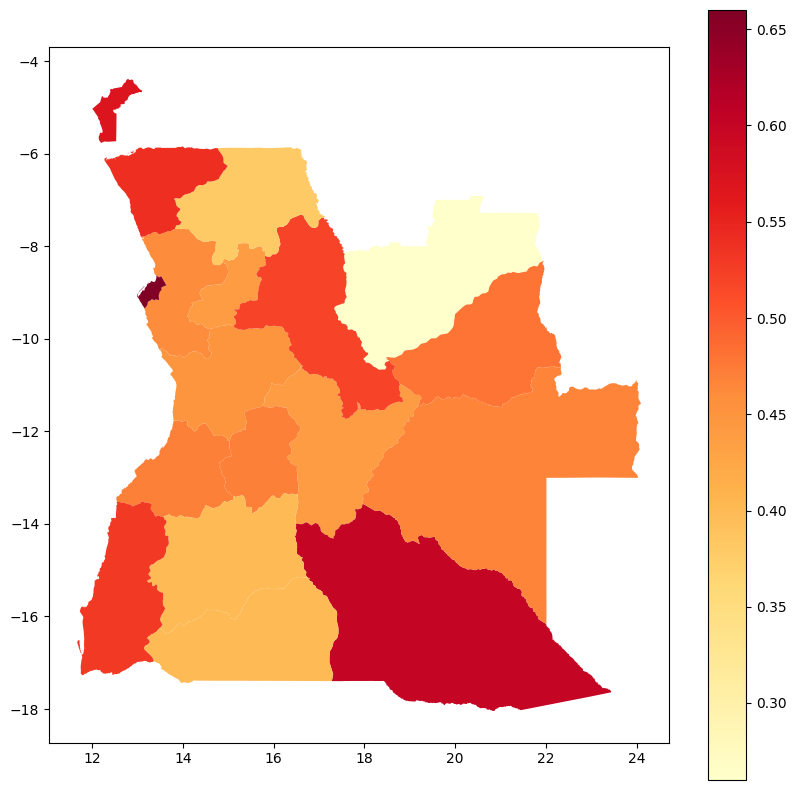

In [6]:
svi.plot(column='SVI_final', legend=True, cmap='YlOrRd', figsize=(10, 10))

In [5]:
import pandas as pd

In [6]:
svi = pd.read_csv('../results/indices/mun_svi_index.csv', encoding='latin-1')
svi

,mun_name,% CREDIT,Credit Score,% worked 1 hour,Paid Activity Score,% Can Read,Literacy Score,% HH Animals,HH Animals Score,% Fishing,...,Internet Score,SVI_Final,Physical,Social,Demographic,Health,Economic,Agricultural,SVI (Equal Weight),SVI (Rank sum weights)
0,Longonjo,0.065217,0.793478,0.736842,0.207895,NaN,NaN,0.125000,0.893041,0.125000,...,NaN,0.385359,0.126500,0.000000,0.058222,0.073924,0.117444,0.645299,0.385359,0.170232
1,Ukuma,0.020000,0.936667,0.762712,0.180085,0.541935,0.501986,0.777778,0.226804,0.000000,...,NaN,0.417462,0.186871,0.180645,0.094910,0.101915,0.109790,0.565010,0.417462,0.206524
2,Golungo Alto,0.152174,0.518115,0.500000,0.462500,0.806202,0.174725,0.879032,0.123462,0.177419,...,NaN,0.342181,0.283304,0.268734,0.094816,0.047409,0.083227,0.476408,0.342181,0.208983
3,Mungo,0.025641,0.918803,0.869048,0.065774,0.413043,0.661603,0.404255,0.608028,0.042553,...,NaN,0.401759,0.305777,0.137681,0.069816,0.001485,0.126342,0.621991,0.401759,0.210515
4,Cuito (Kuito),0.137931,0.563218,0.553785,0.404682,0.609756,0.417998,0.112150,0.906157,0.028037,...,NaN,0.412286,0.134074,0.203252,0.104179,0.071811,0.104479,0.683947,0.412286,0.216957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Belas (Samba),0.090703,0.712774,0.311966,0.664637,0.863454,0.103825,0.804348,0.199686,0.000000,...,1.000000,0.529514,0.778735,0.954485,0.054276,0.211508,0.183140,0.540744,0.529514,0.453815
157,Balombo,0.060000,0.810000,0.684211,0.264474,0.511521,0.539651,0.500000,0.510309,0.000000,...,0.129268,0.593672,0.922682,0.472003,0.473592,0.169016,0.111648,0.610636,0.593672,0.459929
158,Belize,0.000000,1.000000,0.145455,0.843636,0.714286,0.288551,0.295337,0.719192,0.000000,...,0.958537,0.604571,0.818637,0.890941,0.087260,0.214050,0.130987,0.643500,0.604571,0.464229
159,Huambo,0.061303,0.805875,0.530030,0.430218,0.707692,0.296716,0.202830,0.813606,0.014151,...,0.958537,0.610796,0.747378,0.781549,0.447691,0.082082,0.126489,0.672231,0.610796,0.476237


Sort the dataframe by municipality name, alphabetically.

In [17]:
svi_sorted = svi.sort_values('mun_name').reset_index(drop=True)
svi_sorted

,mun_name,% CREDIT,Credit Score,% worked 1 hour,Paid Activity Score,% Can Read,Literacy Score,% HH Animals,HH Animals Score,% Fishing,...,Internet Score,SVI_Final,Physical,Social,Demographic,Health,Economic,Agricultural,SVI (Equal Weight),SVI (Rank sum weights)
0,Alto Zambeze,0.013699,0.956621,0.898876,0.033708,0.397059,0.681398,0.777778,0.226804,0.055556,...,0.875610,0.465903,0.577834,0.728971,0.036268,0.235435,0.134467,0.516845,0.465903,0.371637
1,Ambaca,0.139423,0.558493,0.675325,0.274026,0.703488,0.301922,0.087302,0.931517,0.047619,...,0.944715,0.438932,0.610561,0.672541,0.114611,0.028294,0.082859,0.681188,0.438932,0.365009
2,Amboim (Gabela),0.169312,0.463844,0.204545,0.780114,0.535714,0.509690,0.653846,0.353291,0.192308,...,1.000000,0.471734,0.643561,0.794180,0.120845,0.048576,0.126043,0.501605,0.471734,0.372468
3,Ambriz,0.041096,0.869863,0.142857,0.846429,0.352941,0.736032,0.562500,0.446521,0.250000,...,1.000000,0.467146,0.509747,0.474574,0.100469,0.150779,0.205110,0.510340,0.467146,0.325170
4,Ambuíla,NaN,NaN,NaN,NaN,0.500000,0.553918,0.611111,0.396907,0.166667,...,1.000000,0.454418,0.585237,0.833333,0.026888,0.176310,0.056360,0.534637,0.454418,0.368794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Ukuma,0.020000,0.936667,0.762712,0.180085,0.541935,0.501986,0.777778,0.226804,0.000000,...,NaN,0.417462,0.186871,0.180645,0.094910,0.101915,0.109790,0.565010,0.417462,0.206524
157,Uíge,0.201166,0.362973,0.267416,0.712528,0.643781,0.375862,0.195804,0.820777,0.013986,...,1.000000,0.447501,0.545092,0.734251,0.118506,0.050183,0.090273,0.573863,0.447501,0.352028
158,Viana,0.100890,0.680514,0.272051,0.707545,0.800000,0.182404,0.652381,0.354786,0.009524,...,1.000000,0.429535,0.590206,0.630630,0.109631,0.151451,0.097273,0.476272,0.429535,0.342577
159,Virei,0.208955,0.338307,0.301205,0.676205,0.747126,0.247882,0.414286,0.597791,0.171429,...,1.000000,0.474709,0.795336,0.781058,0.083356,0.048430,0.146838,0.546702,0.474709,0.400287


<Axes: >

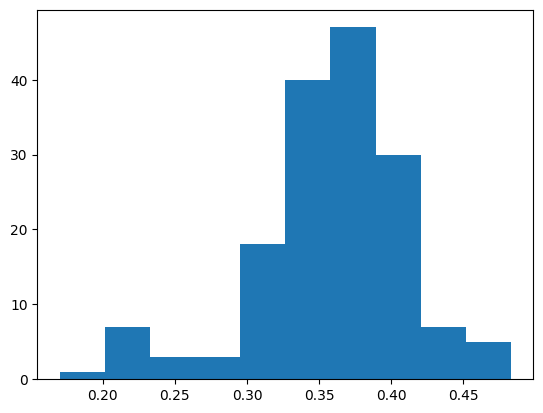

In [28]:
svi_sorted.iloc[:,-1].hist(bins=10, grid=False)

In [8]:
shp_mun = gpd.read_file(shp_path_mun)
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030..."
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608..."
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789..."
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7..."
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632..."
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538..."
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795..."
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216..."


In [88]:
enumerate(svi_sorted.columns)

In [15]:
svi_sorted.columns[-1]

'SVI (Rank sum weights)'

Copy the necessary columns from the SVI dataframe to the geodataframe to be able to visualize each of the subcomponents on a map.

In [10]:
for column_name in svi_sorted.columns:
    shp_mun[column_name] = svi_sorted[column_name]
shp_mun = shp_mun.rename(columns={'SVI (Rank sum weights)': 'SVI (Weighted)'})
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,Internet Score,SVI_Final,Physical,Social,Demographic,Health,Economic,Agricultural,SVI (Equal Weight),SVI (Weighted)
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,...,0.875610,0.465903,0.577834,0.728971,0.036268,0.235435,0.134467,0.516845,0.465903,0.371637
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,...,0.944715,0.438932,0.610561,0.672541,0.114611,0.028294,0.082859,0.681188,0.438932,0.365009
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,...,1.000000,0.471734,0.643561,0.794180,0.120845,0.048576,0.126043,0.501605,0.471734,0.372468
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,...,1.000000,0.467146,0.509747,0.474574,0.100469,0.150779,0.205110,0.510340,0.467146,0.325170
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,...,1.000000,0.454418,0.585237,0.833333,0.026888,0.176310,0.056360,0.534637,0.454418,0.368794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,...,NaN,0.417462,0.186871,0.180645,0.094910,0.101915,0.109790,0.565010,0.417462,0.206524
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,...,1.000000,0.447501,0.545092,0.734251,0.118506,0.050183,0.090273,0.573863,0.447501,0.352028
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,...,1.000000,0.429535,0.590206,0.630630,0.109631,0.151451,0.097273,0.476272,0.429535,0.342577
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,...,1.000000,0.474709,0.795336,0.781058,0.083356,0.048430,0.146838,0.546702,0.474709,0.400287


# Sub-component Maps

## Physical

In [91]:
# Let's create a colormap with 5 colors, to match the drought levels (USDM)
custom_colors = [
    "yellow",
    "#FFDAB9",
    "orange",
    "red",
    "darkred",
]
cmap = colors.ListedColormap(custom_colors)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


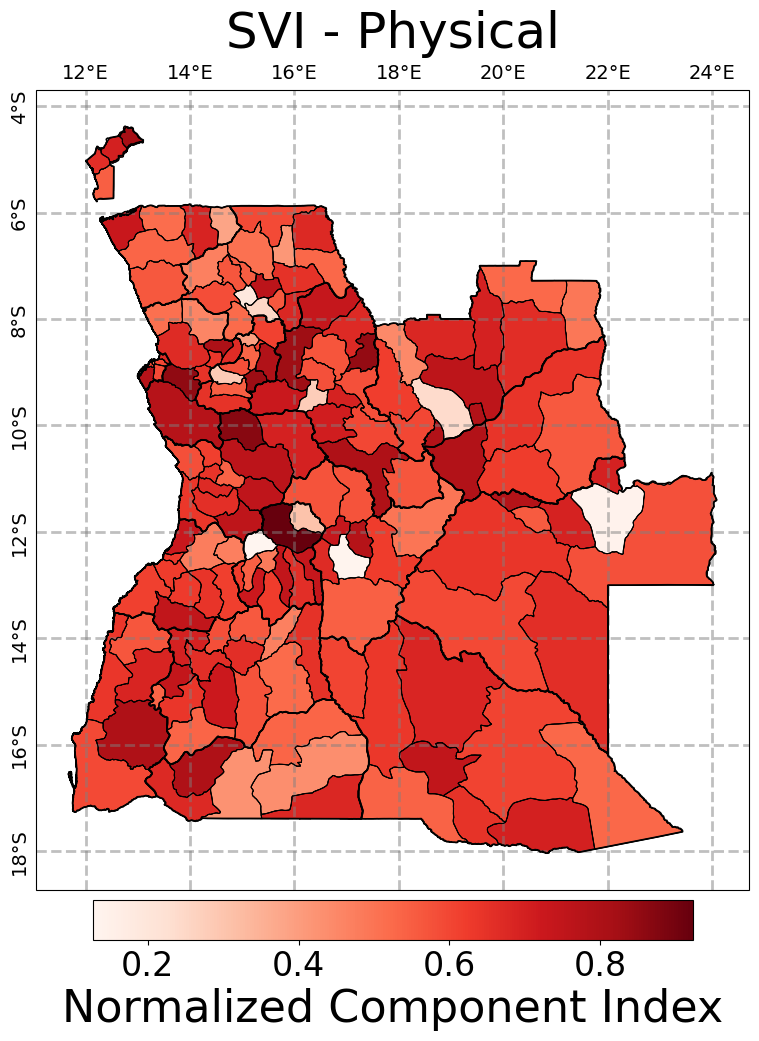

In [92]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Physical', cmap='Reds', linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Normalized Component Index', fontsize=32)

fig.suptitle('SVI - Physical', fontsize=36)

plt.savefig(f'../results/figures/svi_physical_norm.png', dpi=300, bbox_inches='tight')

## Social

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


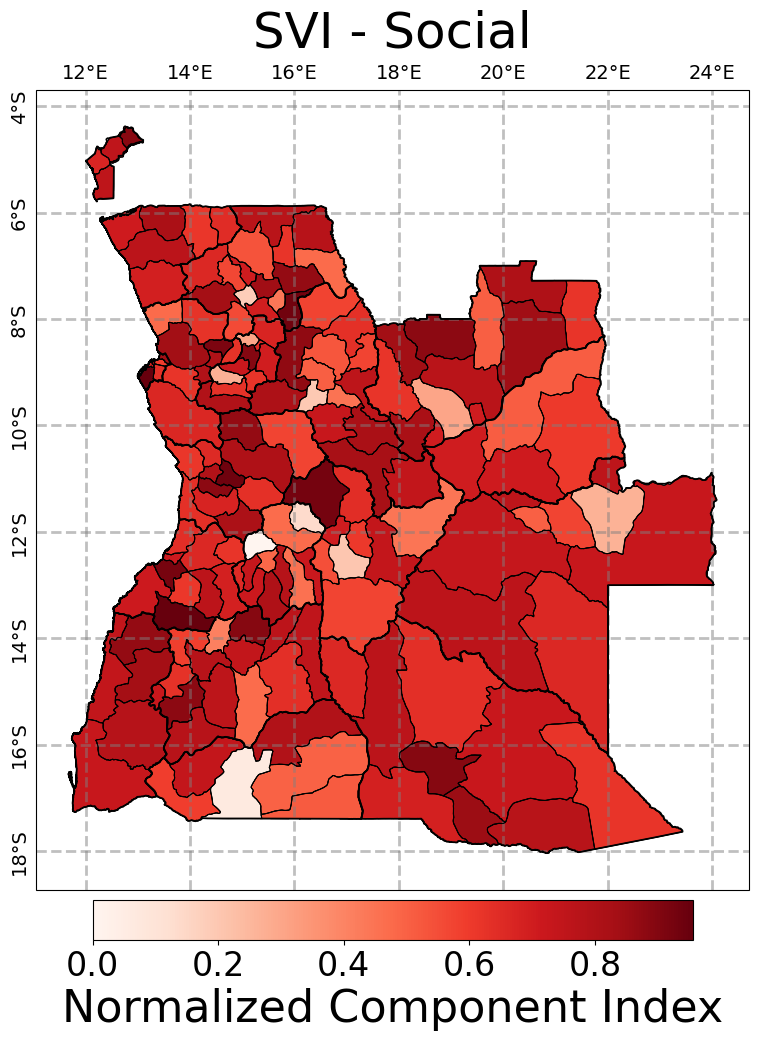

In [62]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Social', cmap='Reds', linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Normalized Component Index', fontsize=32)

fig.suptitle('SVI - Social', fontsize=36)

plt.savefig(f'../results/figures/svi_social_norm.png', dpi=300, bbox_inches='tight')

## Demographic

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


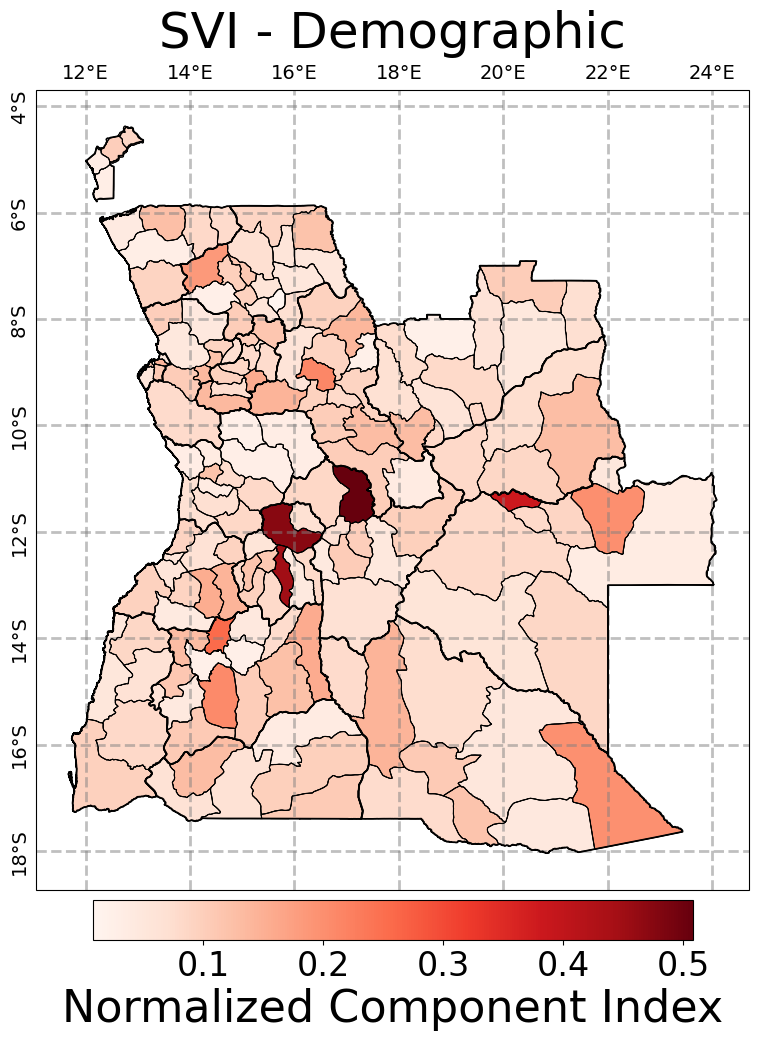

In [63]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Demographic', cmap='Reds', linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Normalized Component Index', fontsize=32)

fig.suptitle('SVI - Demographic', fontsize=36)

plt.savefig(f'../results/figures/svi_demographic_norm.png', dpi=300, bbox_inches='tight')

## Demographic

In [67]:
np.unique(shp_mun['Economic'])

array([0.04020334, 0.04189676, 0.04571295, 0.05636025, 0.0622199 ,
       0.06724343, 0.06933766, 0.07386927, 0.07457972, 0.07505671,
       0.07621427, 0.07751761, 0.07801965, 0.0783324 , 0.07873642,
       0.07900278, 0.07930697, 0.08042354, 0.08046861, 0.08121376,
       0.08285913, 0.08318649, 0.08322665, 0.08363475, 0.08530696,
       0.0854034 , 0.08764012, 0.08907739, 0.08909153, 0.0891954 ,
       0.08922797, 0.08929534, 0.09017116, 0.09027333, 0.09061799,
       0.09126479, 0.0912929 , 0.09192333, 0.09198287, 0.09222159,
       0.09266447, 0.09284018, 0.09313598, 0.09532771, 0.09589146,
       0.09593398, 0.09660953, 0.09687589, 0.09727313, 0.09802513,
       0.09866828, 0.09868088, 0.09880755, 0.09887807, 0.09926209,
       0.09986157, 0.10037188, 0.10052359, 0.10124552, 0.10206687,
       0.10223433, 0.10375648, 0.10437468, 0.10447862, 0.10465791,
       0.10551332, 0.10580412, 0.10595676, 0.10664724, 0.10666639,
       0.10752124, 0.10752996, 0.10760673, 0.10930874, 0.10979

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


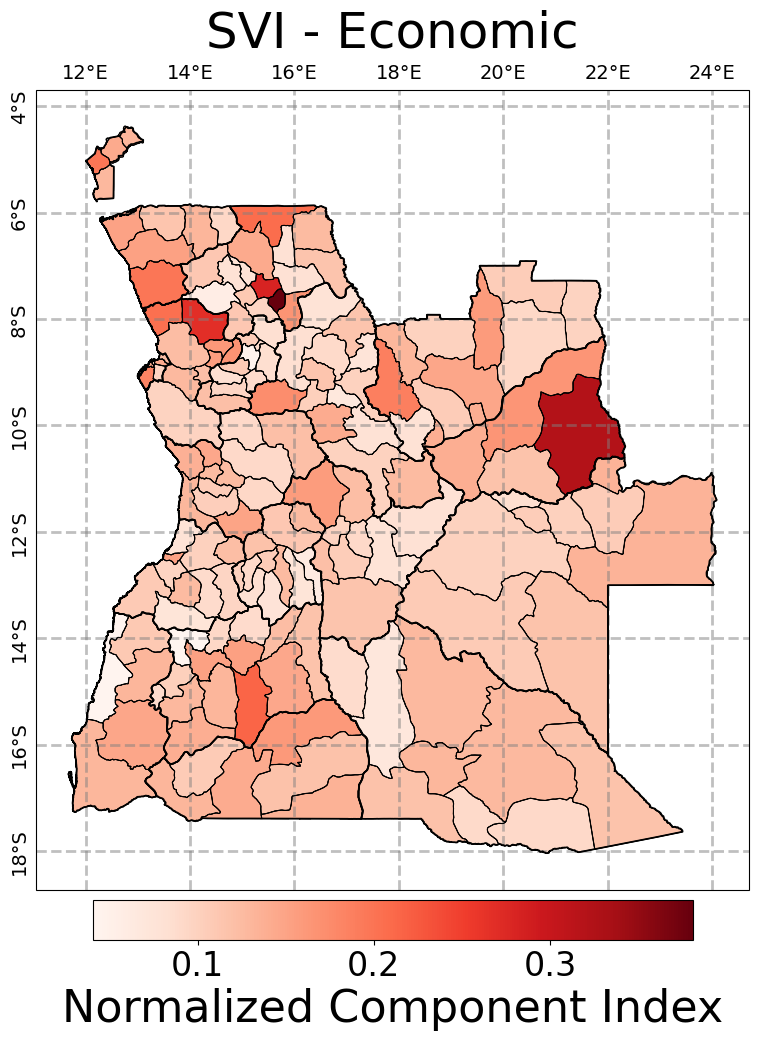

In [66]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Economic', cmap='Reds', linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Normalized Component Index', fontsize=32)

fig.suptitle('SVI - Economic', fontsize=36)

plt.savefig(f'../results/figures/svi_economic_norm.png', dpi=300, bbox_inches='tight')

## Health

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


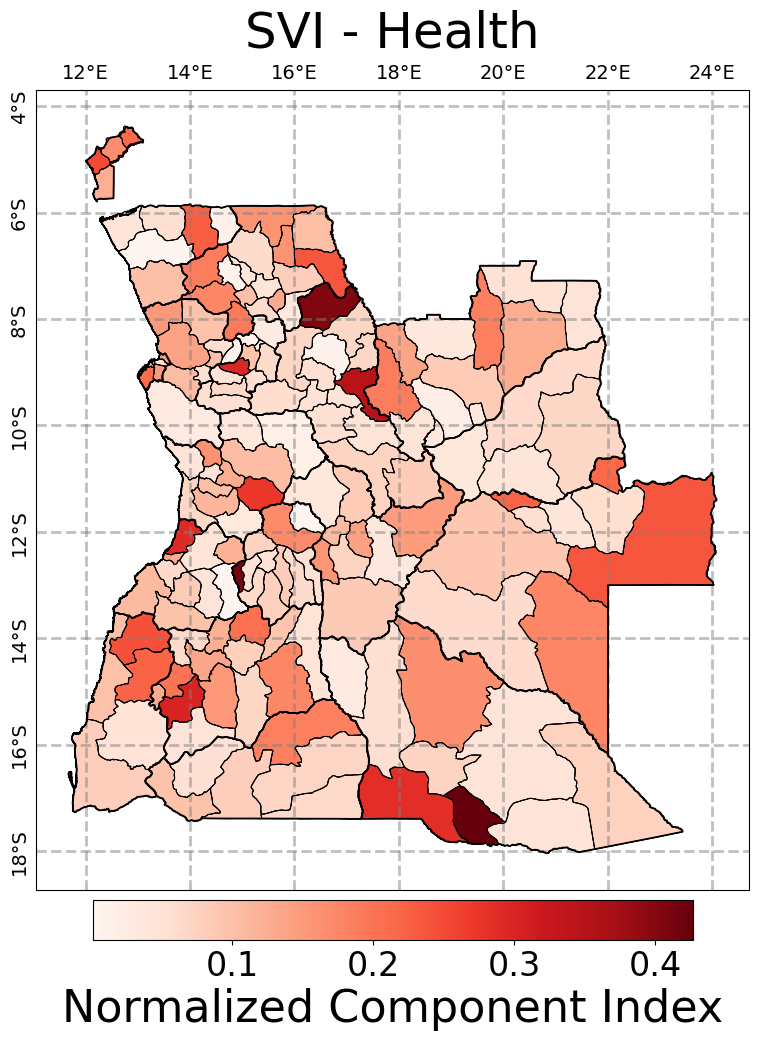

In [68]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Health', cmap='Reds', linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Normalized Component Index', fontsize=32)

fig.suptitle('SVI - Health', fontsize=36)

plt.savefig(f'../results/figures/svi_health_norm.png', dpi=300, bbox_inches='tight')

## Agricultural

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


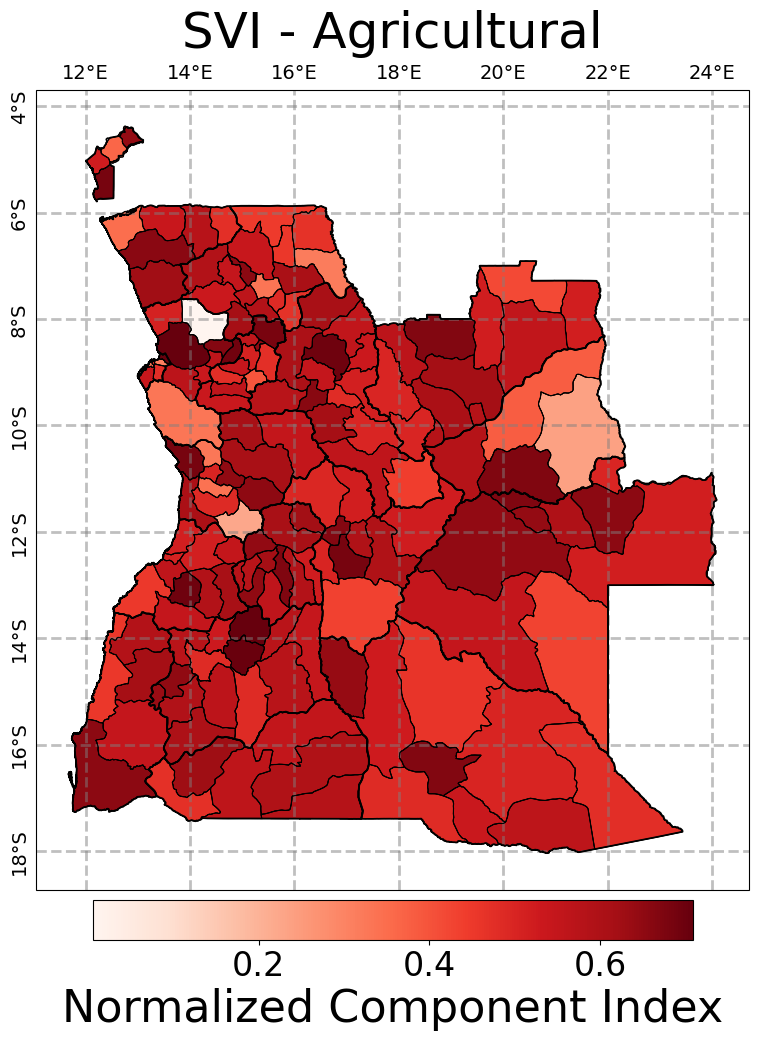

In [69]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Agricultural', cmap='Reds', linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Normalized Component Index', fontsize=32)

fig.suptitle('SVI - Agricultural', fontsize=36)

plt.savefig(f'../results/figures/svi_agri_norm.png', dpi=300, bbox_inches='tight')

## Explore SVI

Higher score means more vulnerable as seen below with the relationship of the two column data: `% Can Read` and `Literacy Score`.

<Axes: >

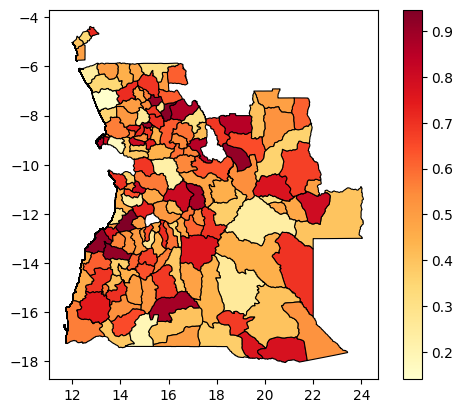

In [99]:
shp_mun.plot(column='% Can Read', cmap='YlOrRd', linewidth=0.8, edgecolor='black', legend=True)

<Axes: >

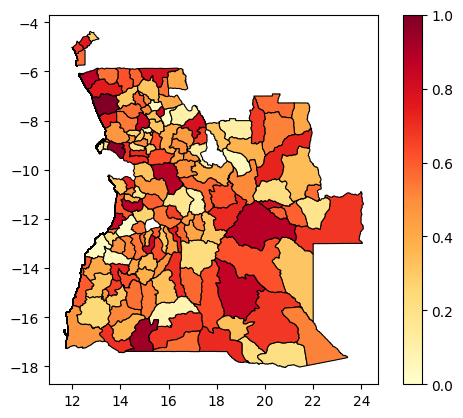

In [100]:
shp_mun.plot(column='Literacy Score', cmap='YlOrRd', linewidth=0.8, edgecolor='black', legend=True)

<Axes: >

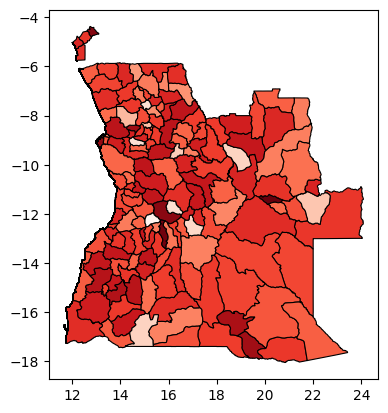

In [73]:
shp_mun.plot(column='SVI (Weighted)', cmap='Reds', linewidth=0.8, edgecolor='black')

In [11]:
np.unique(shp_mun['SVI (Weighted)'])

array([0.17023156, 0.20652374, 0.208983  , 0.21051548, 0.21695708,
       0.22244175, 0.22337022, 0.230042  , 0.23725985, 0.24486379,
       0.2496915 , 0.28179475, 0.28675474, 0.29170984, 0.29737489,
       0.29859467, 0.30286345, 0.30350793, 0.30351618, 0.30557636,
       0.30588204, 0.30743877, 0.3090594 , 0.31022058, 0.31023392,
       0.31082853, 0.3138671 , 0.31953021, 0.31953159, 0.32360906,
       0.32447641, 0.3251699 , 0.32784292, 0.32876212, 0.33001297,
       0.33011716, 0.33067235, 0.33127537, 0.33259867, 0.3332013 ,
       0.33451298, 0.33471912, 0.33541814, 0.33600156, 0.33621393,
       0.33843408, 0.33889029, 0.33955747, 0.34257725, 0.34259709,
       0.34313412, 0.34553852, 0.34800257, 0.34821777, 0.34824504,
       0.34876331, 0.34920415, 0.35037699, 0.35095029, 0.35095269,
       0.35196458, 0.35202824, 0.35267913, 0.35324086, 0.35355958,
       0.35533628, 0.35577163, 0.35591224, 0.35601695, 0.35677801,
       0.35682175, 0.35752638, 0.35821157, 0.35966441, 0.35969

Use natural break to categorize the municipalities according to their weighted SVI index.

In [12]:
import jenkspy

breaks = jenkspy.jenks_breaks(shp_mun['SVI (Weighted)'], n_classes=4)
breaks

[0.170231555, 0.249691496, 0.343134117, 0.394853792, 0.482948368]

In [13]:
shp_mun['SVI Category'] = pd.cut(shp_mun['SVI (Weighted)'], bins=breaks, labels=[0, 1, 2, 3], include_lowest=True)
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,SVI_Final,Physical,Social,Demographic,Health,Economic,Agricultural,SVI (Equal Weight),SVI (Weighted),SVI Category
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,...,0.465903,0.577834,0.728971,0.036268,0.235435,0.134467,0.516845,0.465903,0.371637,2
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,...,0.438932,0.610561,0.672541,0.114611,0.028294,0.082859,0.681188,0.438932,0.365009,2
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,...,0.471734,0.643561,0.794180,0.120845,0.048576,0.126043,0.501605,0.471734,0.372468,2
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,...,0.467146,0.509747,0.474574,0.100469,0.150779,0.205110,0.510340,0.467146,0.325170,1
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,...,0.454418,0.585237,0.833333,0.026888,0.176310,0.056360,0.534637,0.454418,0.368794,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,...,0.417462,0.186871,0.180645,0.094910,0.101915,0.109790,0.565010,0.417462,0.206524,0
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,...,0.447501,0.545092,0.734251,0.118506,0.050183,0.090273,0.573863,0.447501,0.352028,2
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,...,0.429535,0.590206,0.630630,0.109631,0.151451,0.097273,0.476272,0.429535,0.342577,1
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,...,0.474709,0.795336,0.781058,0.083356,0.048430,0.146838,0.546702,0.474709,0.400287,3


(array([11.,  0.,  0., 40.,  0.,  0., 76.,  0.,  0., 34.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

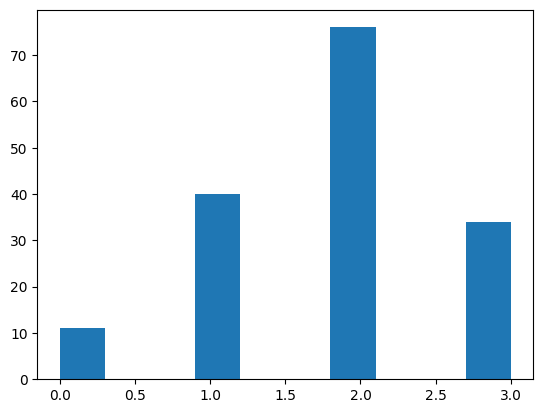

In [14]:
plt.hist(shp_mun['SVI Category'])

# Final Socioeconomic Vulnerability Map

In [107]:
four_colors = [
    "yellow",
    "orange",
    "red",
    "darkred",
]
cmap2 = colors.ListedColormap(four_colors)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_8468\3132167889.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


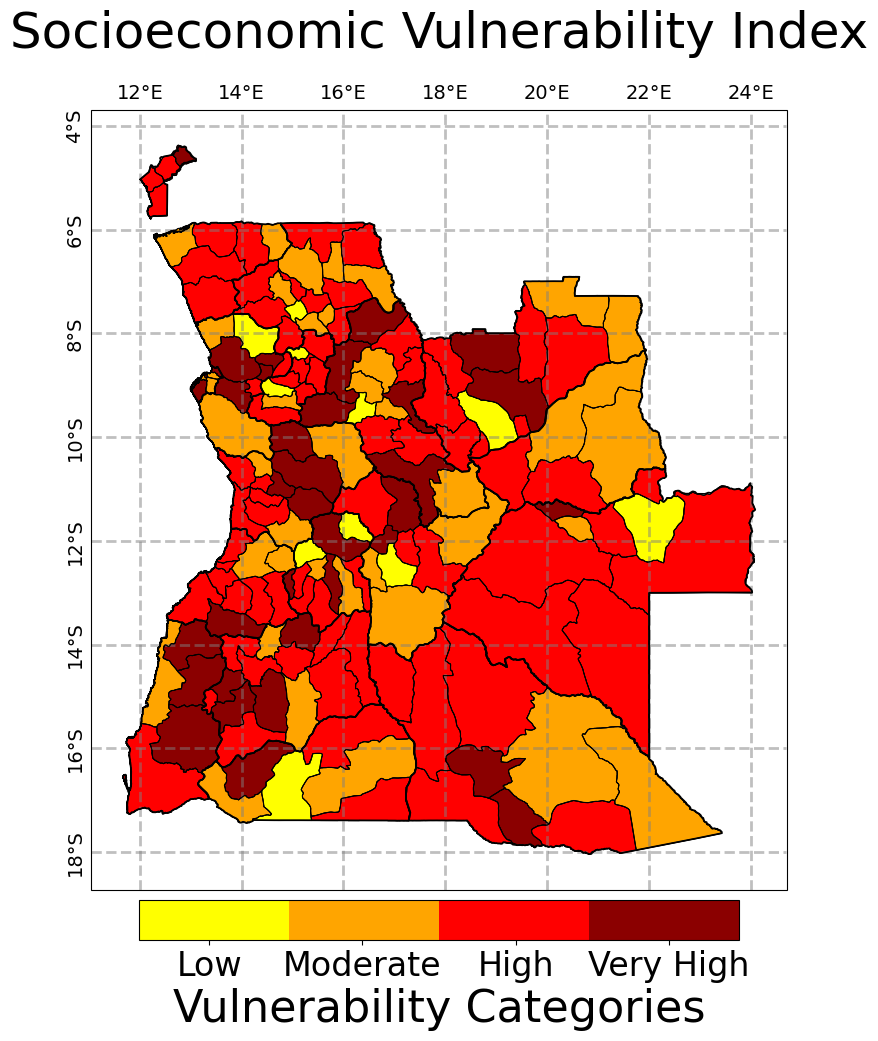

In [115]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.78], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='SVI Category', cmap=cmap2, linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('Vulnerability Categories', fontsize=32)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('Socioeconomic Vulnerability Index', fontsize=36)

plt.savefig(f'../results/figures/mun_final_svi_natural_break.png', dpi=300, bbox_inches='tight')

Save to a csv file!

In [16]:
shp_mun.to_csv('../results/indices/mun_svi_index_with_category.csv', index=False)